#  Linear Regression

In [2]:
import pandas as pd

from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import numpy as np

std_scaler = StandardScaler()

## Load train data

In [3]:
path = "temporal-dna-methylation-master/feature_selection/out/train_test_split/healthy_train_new.csv"
healthy_df = pd.read_csv(path)
healthy_df.head()

,Unnamed: 0,cg16984944,cg24046474,cg15361750,cg17274064,cg07979752,cg10637955,cg26079320,cg13150977,cg26149738,cg17142470,age
0,895,-2.537047,-1.923027,-0.288870,-2.922975,-0.225647,1.479558,-3.590547,-6.460576,-3.398607,0.878943,54.55168
1,730,-1.823718,-0.961649,-0.726370,-1.991516,-1.916372,-1.229572,-2.621142,-2.585565,-1.995068,-1.354322,34.00000
2,688,0.343915,1.639969,2.834769,0.114746,-0.600451,1.089507,-0.963241,-1.629291,-0.157552,0.737649,37.00000
3,805,-6.453289,-5.155530,-6.418441,-4.929690,1.727011,1.561621,-8.109087,-4.676978,-4.752346,-3.254848,30.00000
4,878,-3.056096,-2.006430,1.927509,-3.913521,3.545900,0.173771,-4.161298,-6.855871,-5.084625,-2.158137,20.00000


In [4]:
healthy_df.describe()

,Unnamed: 0,cg16984944,cg24046474,cg15361750,cg17274064,cg07979752,cg10637955,cg26079320,cg13150977,cg26149738,cg17142470,age
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,481.023310,-2.631256,-0.957319,1.814217,-1.784228,-1.300869,1.249311,-3.653451,-4.385224,-2.664168,-1.237045,30.160816
std,274.679199,2.920014,3.139117,4.212812,2.482566,2.898540,2.044573,2.321417,2.969043,2.485932,2.676267,18.567445
min,0.000000,-9.143192,-8.471951,-7.478951,-7.615005,-8.112683,-4.429676,-9.373476,-11.275666,-10.382718,-7.857226,1.000000
25%,245.250000,-4.714996,-3.544075,-0.588708,-3.407921,-2.936090,-0.218632,-4.905677,-6.456819,-4.199975,-3.016891,17.000000
50%,484.500000,-2.258748,-1.141430,1.277609,-1.944573,-1.373215,1.080366,-3.586879,-4.238551,-2.353632,-1.097001,27.000000
75%,714.750000,-0.821434,1.608192,3.421230,-0.002635,0.148107,2.758312,-2.525793,-2.472217,-0.678409,0.143548,37.000000
max,953.000000,7.827241,7.202050,16.086460,7.369812,7.172967,7.234833,4.275042,3.982835,3.339496,8.458369,114.000000


In [5]:
# Remove patient ID column
healthy_df = healthy_df.drop(['Unnamed: 0'], axis=1)

# Shuffle dataframe to randomize data order, possibly preventing confounding factors
healthy_df = shuffle(healthy_df)

# Drop all rows with NaN values
healthy_df = healthy_df.dropna()

# Reset Index
healthy_df.reset_index(inplace=True, drop=True)

healthy_df.head()

,cg16984944,cg24046474,cg15361750,cg17274064,cg07979752,cg10637955,cg26079320,cg13150977,cg26149738,cg17142470,age
0,-5.260038,-2.731460,9.274593,-3.592041,-3.722802,2.162585,-5.422698,-1.359824,-4.590396,-5.467265,32.00
1,-0.764954,1.893339,2.437023,0.617079,-2.203202,2.768665,-2.540880,0.010244,0.937244,-0.673757,16.00
2,-4.399149,-2.889051,1.527544,-0.206961,1.293298,2.059757,-4.713299,-6.568536,-4.188729,0.166679,22.00
3,-8.555543,-5.593488,-4.722723,-6.331057,-7.934271,-0.735030,-7.119457,-10.219411,-7.767104,-4.980858,64.02
4,-5.186420,-3.172762,3.139558,-2.687199,-4.315263,-1.830323,-4.058200,-5.269252,-4.915076,-3.001387,23.00


In [6]:
# Normalizing the methylation data with a Standard Scaler.
X_train = healthy_df[['cg16984944', 'cg24046474', 'cg15361750', 'cg17274064', 'cg07979752', 'cg10637955', 'cg26079320', 'cg13150977', 'cg26149738', 'cg17142470']]

# Separating X vs. y dataframes
X_std = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
y_train = healthy_df['age']

## Load test data

In [7]:
pathtest = "temporal-dna-methylation-master/feature_selection/out/train_test_split/healthy_test_new.csv"
healthy_dftest = pd.read_csv(pathtest)
healthy_dftest.head()

,Unnamed: 0,cg16984944,cg24046474,cg15361750,cg17274064,cg07979752,cg10637955,cg26079320,cg13150977,cg26149738,cg17142470,age
0,212,-8.449803,-5.571089,-4.926659,-6.178786,-7.048047,-1.871663,-8.380508,-10.057040,-7.463612,-4.439368,72.580000
1,452,-4.315263,-3.572637,0.711743,-0.516446,-2.830011,-0.659259,-3.858263,-3.686887,-2.058823,-4.001075,26.000000
2,560,1.133114,-0.934931,1.653385,-1.330337,0.756012,1.644610,-2.286883,-1.393271,-1.828292,0.629141,16.000000
3,757,-2.530654,-1.707470,-1.653075,-2.201073,-2.644887,-1.246607,-2.244796,-3.228527,-2.078759,-1.098593,34.000000
4,601,-2.334433,1.455104,1.033295,-0.585704,2.452449,4.846453,-2.947463,-0.667442,-1.971490,2.080882,16.083333


In [8]:
healthy_dftest.describe()

,Unnamed: 0,cg16984944,cg24046474,cg15361750,cg17274064,cg07979752,cg10637955,cg26079320,cg13150977,cg26149738,cg17142470,age
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,436.072917,-3.006526,-1.027762,0.838408,-1.913259,-1.890039,1.136500,-3.971274,-4.744691,-2.937943,-1.546967,30.048607
std,281.353617,2.924061,3.400553,3.628254,2.541362,2.857164,2.160146,2.176179,2.870698,2.706044,2.471756,18.572374
min,5.000000,-9.065622,-6.488718,-8.018039,-7.129381,-7.445381,-3.425800,-9.482815,-10.417344,-8.362808,-7.547755,1.083333
25%,207.250000,-4.836033,-3.965372,-1.567025,-3.424868,-3.586919,-0.530927,-4.716043,-6.759502,-4.807967,-3.099087,17.750000
50%,392.000000,-2.397751,-1.198353,1.003443,-2.022322,-1.532900,1.123299,-3.767427,-4.160157,-2.351059,-1.230510,25.500000
75%,701.000000,-1.054681,1.921356,2.762001,-0.391814,-0.327156,2.848733,-2.780192,-2.963723,-1.081843,0.252680,36.250000
max,937.000000,4.197054,6.214391,11.556038,6.328598,5.952907,5.772935,0.170928,1.379741,1.514534,2.809013,72.580000


In [9]:
# Remove patient ID column
healthy_dftest = healthy_dftest.drop(['Unnamed: 0'], axis=1)

# Shuffle dataframe to randomize data order, possibly preventing confounding factors
healthy_dftest = shuffle(healthy_dftest)

# Drop all rows with NaN values
healthy_dftest = healthy_dftest.dropna()

# Reset Index
healthy_dftest.reset_index(inplace=True, drop=True)

healthy_dftest.head()

,cg16984944,cg24046474,cg15361750,cg17274064,cg07979752,cg10637955,cg26079320,cg13150977,cg26149738,cg17142470,age
0,0.344151,2.770025,10.883392,3.426173,2.720533,2.869385,0.170928,0.112437,-1.208108,0.963930,1.50
1,-5.572410,-3.266269,-3.964951,-4.976653,-2.116595,0.591622,-6.335252,-5.117627,-0.390097,-4.374608,63.00
2,-8.374772,-4.782901,-3.214200,-6.497674,-7.445381,-0.141232,-8.044503,-7.457637,-8.162158,-6.011594,64.02
3,-2.430136,-3.429825,-0.459321,0.711743,-2.115948,0.768868,-5.197845,-7.051554,-2.801449,0.825993,21.00
4,-9.065622,-5.738131,-4.519343,-4.330441,-6.744462,-0.702520,-8.106198,-9.614658,-7.196462,-6.292577,63.09


In [10]:
# Normalizing the methylation data with a Standard Scaler.
X_test = healthy_dftest[['cg16984944', 'cg24046474', 'cg15361750', 'cg17274064', 'cg07979752', 'cg10637955', 'cg26079320', 'cg13150977', 'cg26149738', 'cg17142470']]

# Separating X vs. y dataframes
X_std = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)
y_test = healthy_dftest['age']

## Training the Linear Regression model for healthy patients

In [12]:
# Training the multivariate linear regression model
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

# Accuracy on the testing set
print(linear_regressor.score(X_test, y_test))

0.6659971684405848


In [13]:
predictions = linear_regressor.predict(X_test)

# Since age cannot be negative, changing all negative predictions to age 0
for n, element in enumerate(predictions):
    if element < 0:
        predictions[n] = 0

# Looking at sample predictions for the testing set
for i in range(0, 10):
    print("Prediction:", predictions[i], "\tActual:", y_test.iloc[i])

Prediction: 8.007295844590804 	Actual: 1.5
Prediction: 39.22963235534702 	Actual: 63.0
Prediction: 56.34158141156935 	Actual: 64.02
Prediction: 24.11249714936126 	Actual: 21.0
Prediction: 53.76024983190007 	Actual: 63.09
Prediction: 29.001772330399895 	Actual: 27.0
Prediction: 18.601790955332305 	Actual: 13.0
Prediction: 36.70902723483016 	Actual: 34.0
Prediction: 33.568642152676055 	Actual: 26.0
Prediction: 27.513384410650602 	Actual: 37.0


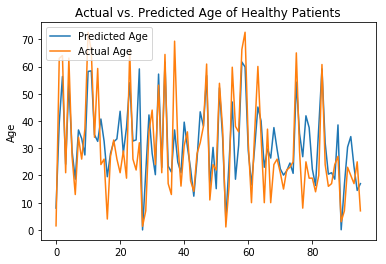

In [14]:
plt.plot(predictions)
plt.plot(y_test)
plt.title("Actual vs. Predicted Age of Healthy Patients")
plt.ylabel('Age')
plt.legend(['Predicted Age', 'Actual Age'], loc='upper left')
plt.show()

0.6260947412695611 12.900979194315923 0.8246202713639744 5.470183314603862e-25 0.04429942275587549


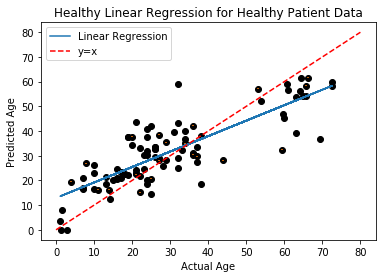

In [15]:
import scipy
from scipy import stats
from scipy.stats import linregress 
# Plot linear regression
plt.clf()
plt.scatter(y_test, predictions, color="black")
#plt.plot(diabetes_Y, diabetes_predictions, color="blue", linewidth=3)
slope, intercept, r_value, p_value, stderr = scipy.stats.linregress(y_test, predictions)
print(slope, intercept, r_value, p_value, stderr)
best_fit_line_points = [slope*i+intercept for i in y_test]
plt.plot(y_test, best_fit_line_points, label = "Linear Regression")
plt.errorbar(y_test,predictions, yerr = stderr, ls = 'none')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

x = np.linspace(0,80,500)
plt.plot(x,x, '--r', label='y=x')

plt.title("Healthy Linear Regression for Healthy Patient Data")
plt.legend()
plt.show()

In [16]:
y_test_list = y_test.tolist()

# Getting the average age difference between actual and predicted ages
total = 0
for i in range(0, len(predictions)) :
    diff = abs(predictions[i] - y_test[i])
    total = total + diff
avg_age_diff = total / len(predictions)
print(avg_age_diff)

8.374543804277698


## Testing on Type I Diabetes patients

### Load diabetic test data

In [17]:
pathdia = "temporal-dna-methylation-master/feature_selection/out/train_test_split/diab_test_new.csv"
diabetes = pd.read_csv(pathdia)
diabetes.head()
diabetes.describe()

,Unnamed: 0,cg16984944,cg24046474,cg15361750,cg17274064,cg07979752,cg10637955,cg26079320,cg13150977,cg26149738,cg17142470,age
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,76.800000,0.108557,0.081650,-0.105540,-0.036190,-0.030096,0.173179,-0.027662,-0.218552,-0.018383,-0.208277,15.400000
std,60.133711,0.934093,0.834511,0.947867,0.804095,0.736333,0.923730,0.582246,0.840858,0.991982,0.749096,6.572671
min,5.000000,-2.321440,-2.635780,-3.092812,-1.563051,-1.103360,-2.459923,-1.715980,-1.655566,-2.912845,-2.007111,4.000000
25%,23.000000,-0.292127,-0.285265,-0.364507,-0.553567,-0.814095,-0.312117,-0.306791,-0.880732,-0.236095,-0.605743,10.750000
50%,58.000000,0.115334,0.090181,-0.051746,-0.039222,0.112383,0.397675,0.055745,-0.360604,0.344300,-0.136111,13.500000
75%,121.500000,0.385005,0.658688,0.369706,0.498079,0.561636,0.688553,0.403544,0.224276,0.611810,0.239080,22.250000
max,184.000000,2.889248,1.119242,1.085335,1.477382,0.985319,1.771795,0.733498,1.536522,0.877011,1.404475,25.000000


In [18]:
# Remove patient ID column
diabetes = diabetes.drop(['Unnamed: 0'], axis=1)

# Drop all rows with NaN values
diabetes = diabetes.dropna()

diabetes_X = diabetes[['cg16984944', 'cg24046474', 'cg15361750', 'cg17274064', 'cg07979752', 'cg10637955', 'cg26079320', 'cg13150977', 'cg26149738', 'cg17142470']]
diabetes_X = pd.DataFrame(std_scaler.fit_transform(diabetes_X), columns=diabetes_X.columns)
diabetes_Y = diabetes['age']

diabetes_predictions = linear_regressor.predict(diabetes_X)

# Since age cannot be negative, changing all negative predictions to age 0
for n, element in enumerate(diabetes_predictions):
    if element < 0:
        diabetes_predictions[n] = 0

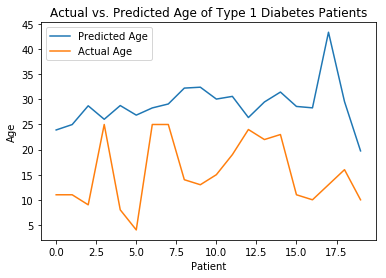

In [34]:
plt.plot(diabetes_predictions)
plt.plot(diabetes_Y)
plt.title("Actual vs. Predicted Age of Type 1 Diabetes Patients")
plt.xlabel('Patient')
plt.ylabel('Age')
plt.legend(['Predicted Age', 'Actual Age'], loc='upper left')
plt.show()

0.05699261377934701 28.069284184250307 0.08286424645889123 0.7283532785991138 0.1615544616513411


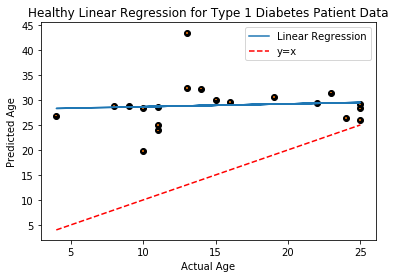

In [21]:
import scipy
from scipy import stats
from scipy.stats import linregress 
# Plot linear regression
plt.clf()
plt.scatter(diabetes_Y, diabetes_predictions, color="black")
#plt.plot(diabetes_Y, diabetes_predictions, color="blue", linewidth=3)
slope, intercept, r_value, p_value, stderr = scipy.stats.linregress(diabetes_Y, diabetes_predictions)
print(slope, intercept, r_value, p_value, stderr)
best_fit_line_points = [slope*i+intercept for i in diabetes_Y]
plt.plot(diabetes_Y, best_fit_line_points, label = "Linear Regression")
plt.errorbar(diabetes_Y,diabetes_predictions, yerr = stderr, ls = 'none')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

x = np.linspace(4,25,100)
plt.plot(x,x, '--r', label='y=x')

plt.title("Healthy Linear Regression for Type 1 Diabetes Patient Data")
plt.legend()
plt.show()


In [22]:
print(diabetes_Y)
diabetes_Y_list = diabetes_Y.tolist()
print(diabetes_Y_list)

0     11.0
1     11.0
2      9.0
3     25.0
4      8.0
5      4.0
6     25.0
7     25.0
8     14.0
9     13.0
10    15.0
11    19.0
12    24.0
13    22.0
14    23.0
15    11.0
16    10.0
17    13.0
18    16.0
19    10.0
Name: age, dtype: float64
[11.0, 11.0, 9.0, 25.0, 8.0, 4.0, 25.0, 25.0, 14.0, 13.0, 15.0, 19.0, 24.0, 22.0, 23.0, 11.0, 10.0, 13.0, 16.0, 10.0]


In [23]:
# Getting the average age difference between actual and predicted ages
total = 0
for i in range(0, len(diabetes_predictions)) :
    diff = abs(diabetes_predictions[i] - diabetes_Y_list[i])
    total = total + diff
avg_age_diff = total / len(diabetes_predictions)
print(avg_age_diff)

13.546970436452256


## Training model on Diabetic patient data


In [24]:
path = "temporal-dna-methylation-master/feature_selection/out/train_test_split/diab_train_new.csv"
diabetic_df = pd.read_csv(path)
diabetic_df.head()

,Unnamed: 0,cg16984944,cg24046474,cg15361750,cg17274064,cg07979752,cg10637955,cg26079320,cg13150977,cg26149738,cg17142470,age
0,50,-0.218073,1.337010,-1.146946,-0.866917,-0.388411,-1.124185,0.311439,-0.493173,-0.654076,-0.413234,11.0
1,165,1.850020,0.422512,1.359517,-0.092765,1.746882,2.498865,0.253335,-0.697384,0.609311,-0.152260,25.0
2,93,0.499513,1.020244,0.717027,0.210265,0.885879,0.944118,-0.371876,-0.912860,-0.816654,-0.641304,1.0
3,77,-0.326346,-0.282980,0.087241,0.170287,-0.610060,-0.383056,-0.258869,-0.436280,-0.227582,0.406839,27.0
4,176,-0.798934,-0.320935,-0.043588,0.761191,0.845579,-0.905851,-0.304832,1.133860,0.612032,-0.411806,15.0


In [25]:
diabetic_df.describe()

,Unnamed: 0,cg16984944,cg24046474,cg15361750,cg17274064,cg07979752,cg10637955,cg26079320,cg13150977,cg26149738,cg17142470,age
count,174.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,174.000000
mean,99.201149,-0.014546,-0.004561,0.017668,0.010089,-0.003535,-0.027146,0.011785,0.026216,0.003451,0.031516,16.367816
std,55.855923,1.011649,1.019915,1.007986,1.021933,1.026412,1.007359,1.035174,1.018620,1.006496,1.021977,6.155246
min,0.000000,-2.635223,-3.380779,-3.100795,-1.917590,-2.229541,-3.270880,-1.999947,-1.791747,-2.905580,-2.764939,1.000000
25%,52.250000,-0.316653,-0.372279,-0.370832,-0.655772,-0.610060,-0.383056,-0.420793,-0.689272,-0.284343,-0.393945,12.000000
50%,97.500000,0.035792,0.113747,0.141759,-0.116038,-0.099095,0.130496,-0.013748,-0.150463,0.195527,0.095916,16.000000
75%,147.750000,0.427625,0.680880,0.709843,0.482396,0.481965,0.516412,0.402378,0.657297,0.653494,0.481346,20.000000
max,194.000000,4.449347,2.324960,2.853089,4.757459,3.395574,2.745074,6.891585,5.486714,2.018788,6.185911,32.000000


In [26]:
# Remove patient ID column
diabetic_df = diabetic_df.drop(['Unnamed: 0'], axis=1)

# Shuffle dataframe to randomize data order, possibly preventing confounding factors
diabetic_df = shuffle(diabetic_df)

# Drop all rows with NaN values
diabetic_df = diabetic_df.dropna()

# Reset Index
diabetic_df.reset_index(inplace=True, drop=True)

diabetic_df.head()

,cg16984944,cg24046474,cg15361750,cg17274064,cg07979752,cg10637955,cg26079320,cg13150977,cg26149738,cg17142470,age
0,-0.647707,-1.035274,-0.260020,-0.627552,-0.716333,-0.719304,-0.814120,2.340042,-0.748458,-0.304640,24.0
1,0.035815,0.344952,0.344332,-0.689547,-0.982527,0.289246,-0.294553,0.699114,-0.018986,-0.091210,13.0
2,0.801702,1.486432,0.014495,1.211605,0.877331,-0.040145,-0.160055,-0.517391,-0.003520,0.994132,23.0
3,0.728092,-0.148927,0.883497,2.124711,0.092531,0.935115,0.570341,-0.689272,0.749330,0.308136,12.0
4,0.230031,0.539509,-0.705086,1.172805,-0.249693,-0.261448,0.662871,-0.291095,0.829039,0.422416,10.0


In [27]:
# Normalizing the methylation data with a Standard Scaler.
diab_X_train = diabetic_df[['cg16984944','cg24046474','cg15361750','cg17274064','cg07979752','cg10637955','cg26079320','cg13150977','cg26149738','cg17142470']]

# Separating X vs. y dataframes
diab_X_std = pd.DataFrame(std_scaler.fit_transform(diab_X_train), columns=diab_X_train.columns)
diab_y_train = diabetic_df['age']

In [28]:
# Training the multivariate linear regression model
diab_linear_regressor = linear_model.LinearRegression()
diab_linear_regressor.fit(diab_X_train, diab_y_train)

# Accuracy on the testing set
print(diab_linear_regressor.score(diabetes_X, diabetes_Y))

0.0028837578552877163


### Testing diabetic model on diabetic test data

In [29]:
diab_predictions = diab_linear_regressor.predict(diabetes_X)

# Since age cannot be negative, changing all negative predictions to age 0
for n, element in enumerate(diab_predictions):
    if element < 0:
        diab_predictions[n] = 0

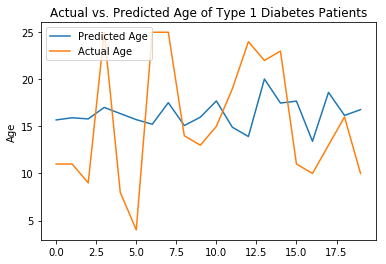

In [30]:
plt.plot(diab_predictions)
plt.plot(diabetes_Y)
plt.title("Actual vs. Predicted Age of Type 1 Diabetes Patients")
plt.ylabel('Age')
plt.legend(['Predicted Age', 'Actual Age'], loc='upper left')
plt.show()

0.04074743872672077 15.72172455879734 0.17118993200562058 0.4705139452273083 0.05527477934671312


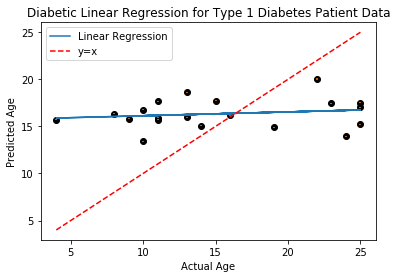

In [33]:
# Plot linear regression
plt.clf()
plt.scatter(diabetes_Y, diab_predictions, color="black")
slope, intercept, r_value, p_value, stderr = scipy.stats.linregress(diabetes_Y, diab_predictions)
print(slope, intercept, r_value, p_value, stderr)
best_fit_line_points = [slope*i+intercept for i in diabetes_Y]
plt.plot(diabetes_Y, best_fit_line_points, label = "Linear Regression")
plt.errorbar(diabetes_Y,diab_predictions, yerr = stderr, ls = 'none')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

x = np.linspace(4,25,100)
plt.plot(x,x, '--r', label='y=x')

plt.title("Diabetic Linear Regression for Type 1 Diabetes Patient Data")
plt.legend()
plt.show()

In [32]:
# Getting the average age difference between actual and predicted ages
total = 0
for i in range(0, len(diab_predictions)) :
    diff = abs(diab_predictions[i] - diabetes_Y_list[i])
    total = total + diff
avg_age_diff = total / len(diab_predictions)
print(avg_age_diff)

5.639428833107745
